In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot

df1=pd.read_csv("C:/Users/chahd/Desktop/nutrition/demographic.csv")
df1.head()
df2=pd.read_csv("C:/Users/chahd/Desktop/nutrition/questionnaire.csv")



This cell imports the necessary libraries for data analysis and visualization.
df1 is loaded from the demographic dataset and df2 from the questionnaire dataset.

In [2]:
nan_percentage = df1.isna().mean() * 100
print(nan_percentage)

SEQN         0.000000
SDDSRVYR     0.000000
RIDSTATR     0.000000
RIAGENDR     0.000000
RIDAGEYR     0.000000
RIDAGEMN    93.385749
RIDRETH1     0.000000
RIDRETH3     0.000000
RIDEXMON     3.557740
RIDEXAGM    58.594595
DMQMILIZ    38.466830
DMQADFC     94.663391
DMDBORN4     0.000000
DMDCITZN     0.039312
DMDYRSUS    81.248157
DMDEDUC3    72.452088
DMDEDUC2    43.302211
DMDMARTL    43.302211
RIDEXPRG    87.135135
SIALANG      0.000000
SIAPROXY     0.009828
SIAINTRP     0.000000
FIALANG      1.189189
FIAPROXY     1.189189
FIAINTRP     1.189189
MIALANG     28.147420
MIAPROXY    28.137592
MIAINTRP    28.127764
AIALANGA    37.916462
DMDHHSIZ     0.000000
DMDFMSIZ     0.000000
DMDHHSZA     0.000000
DMDHHSZB     0.000000
DMDHHSZE     0.000000
DMDHRGND     0.000000
DMDHRAGE     0.000000
DMDHRBR4     2.918919
DMDHREDU     2.889435
DMDHRMAR     1.208845
DMDHSEDU    47.498771
WTINT2YR     0.000000
WTMEC2YR     0.000000
SDMVPSU      0.000000
SDMVSTRA     0.000000
INDHHIN2     1.307125
INDFMIN2  

 This calculates the percentage of missing values (NaN) in each column of df1. It's useful for deciding which columns to keep or drop.

In [5]:
threshold = 50  
df1_cleaned = df1.loc[:, nan_percentage < threshold]
print(df1_cleaned.head())

    SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDRETH1  RIDRETH3  \
0  73557         8         2         1        69         4         4   
1  73558         8         2         1        54         3         3   
2  73559         8         2         1        72         3         3   
3  73560         8         2         1         9         3         3   
4  73561         8         2         2        73         3         3   

   RIDEXMON  DMQMILIZ  DMDBORN4  ...  DMDHREDU  DMDHRMAR  DMDHSEDU  \
0       1.0       1.0         1  ...       3.0       4.0       NaN   
1       1.0       2.0         1  ...       3.0       1.0       1.0   
2       2.0       1.0         1  ...       4.0       1.0       3.0   
3       1.0       NaN         1  ...       3.0       1.0       4.0   
4       1.0       2.0         1  ...       5.0       1.0       5.0   

       WTINT2YR      WTMEC2YR  SDMVPSU  SDMVSTRA  INDHHIN2  INDFMIN2  INDFMPIR  
0  13281.237386  13481.042095        1       112       4.0       

In [ ]:
This removes columns from df1 that have 50% or more missing values. The remaining columns are stored in df1_cleaned.

In [7]:
for column in df1.columns:
    print(f"Unique values in column '{column}':")
    print(df1[column].unique())
    print("\n")

Unique values in column 'SEQN':
[73557 73558 73559 ... 83729 83730 83731]


Unique values in column 'SDDSRVYR':
[8]


Unique values in column 'RIDSTATR':
[2 1]


Unique values in column 'RIAGENDR':
[1 2]


Unique values in column 'RIDAGEYR':
[69 54 72  9 73 56  0 61 42 65 26 76 10 33  1 16 32 18 12 38 50 23  7 13
 28  4 14 11 35  2  6 29  3 58 57 20 37 75 43 60 55 62 36 80 31 63 71 67
 64  8 46 44 19 70 59 25 39  5 24 30 49 45 51 77 78 66 79 47 48 53 15 17
 21 68 52 34 40 27 41 22 74]


Unique values in column 'RIDAGEMN':
[nan  5. 10. 18.  0. 23.  1. 11.  9.  3.  4.  6.  7.  2. 22.  8. 15. 19.
 21. 20. 14. 13. 12. 16. 17. 24.]


Unique values in column 'RIDRETH1':
[4 3 1 2 5]


Unique values in column 'RIDRETH3':
[4 3 1 2 7 6]


Unique values in column 'RIDEXMON':
[ 1.  2. nan]


Unique values in column 'RIDEXAGM':
[ nan 119.   6. 109. 125. 128.  19. 194. 218. 147.  86. 158.  58. 174.
 140.  30.  76.  47. 161. 149.  49. 199.  39.  43.  79.  45.   1. 166.
  50.  23.  25. 103.  52. 200. 

this cell Prints unique values for each column to explore data variety.

In [9]:
bins = [0, 18, 30, 45, 60, 80, 120]
labels = ['<18', '18-30', '31-45', '46-60', '61-80', '80+']

df1_cleaned['AgeGroup'] = pd.cut(df1_cleaned['RIDAGEYR'], bins=bins, labels=labels)

C:\Users\chahd\AppData\Local\Temp\ipykernel_17988\1322660059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned['AgeGroup'] = pd.cut(df1_cleaned['RIDAGEYR'], bins=bins, labels=labels)


Creates age groups based on RIDAGEYR and adds them as AgeGroup.

In [11]:
gender_mapping = {1: "Male", 2: "Female"}
df1_cleaned['Gender'] = df1_cleaned['RIAGENDR'].map(gender_mapping)

C:\Users\chahd\AppData\Local\Temp\ipykernel_17988\1766377284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned['Gender'] = df1_cleaned['RIAGENDR'].map(gender_mapping)


Maps RIAGENDR to 'Male' and 'Female' in a new Gender column.

In [13]:
df1_cleaned = df1_cleaned.apply(lambda x: x.fillna(x.mode()[0]), axis=0)
for column in df1_cleaned.columns:
    print(f"Unique values in column '{column}':")
    print(df1_cleaned[column].unique())
    print("\n")

Unique values in column 'SEQN':
[73557 73558 73559 ... 83729 83730 83731]


Unique values in column 'SDDSRVYR':
[8]


Unique values in column 'RIDSTATR':
[2 1]


Unique values in column 'RIAGENDR':
[1 2]


Unique values in column 'RIDAGEYR':
[69 54 72  9 73 56  0 61 42 65 26 76 10 33  1 16 32 18 12 38 50 23  7 13
 28  4 14 11 35  2  6 29  3 58 57 20 37 75 43 60 55 62 36 80 31 63 71 67
 64  8 46 44 19 70 59 25 39  5 24 30 49 45 51 77 78 66 79 47 48 53 15 17
 21 68 52 34 40 27 41 22 74]


Unique values in column 'RIDRETH1':
[4 3 1 2 5]


Unique values in column 'RIDRETH3':
[4 3 1 2 7 6]


Unique values in column 'RIDEXMON':
[1. 2.]


Unique values in column 'DMQMILIZ':
[1. 2. 7.]


Unique values in column 'DMDBORN4':
[ 1  2 77 99]


Unique values in column 'DMDCITZN':
[1. 2. 7. 9.]


Unique values in column 'DMDEDUC2':
[3. 4. 5. 2. 1. 9. 7.]


Unique values in column 'DMDMARTL':
[ 4.  1.  3.  2.  5.  6. 77. 99.]


Unique values in column 'SIALANG':
[1 2]


Unique values in column 'SIAPRO

This line fills missing values (NaN) in each column of df1_cleaned using the most frequent value (mode) of that column.

In [15]:

df1_cleaned1 = df1_cleaned.drop_duplicates()



Removes duplicate rows.

In [17]:
nan_percentage = df2.isna().mean() * 100
print(nan_percentage)

SEQN        0.000000
ACD011A    43.400491
ACD011B    99.842752
ACD011C    98.319410
ACD040     76.668305
             ...    
WHD140     40.019656
WHQ150     40.835381
WHQ030M    85.474201
WHQ500     85.474201
WHQ520     85.474201
Length: 953, dtype: float64


In [19]:
threshold = 50  
df2_cleaned = df2.loc[:, nan_percentage < threshold]
print(df2_cleaned.head())

    SEQN  ACD011A  ALQ101  BPQ020  BPQ056  BPQ059  BPQ080  CBD070  CBD090  \
0  73557      1.0     1.0     1.0     2.0     2.0     1.0   300.0     0.0   
1  73558      1.0     1.0     1.0     1.0     2.0     1.0   642.0   214.0   
2  73559      1.0     1.0     1.0     2.0     2.0     1.0   150.0    25.0   
3  73560      1.0     NaN     NaN     NaN     NaN     NaN   400.0     0.0   
4  73561      1.0     1.0     1.0     1.0     2.0     2.0   200.0     0.0   

   CBD110  ...  SMDANY  SMAQUEX.y  WHD010  WHD020  WHQ030  WHQ040  WHD050  \
0    50.0  ...     1.0        2.0    69.0   180.0     3.0     3.0   210.0   
1   128.0  ...     1.0        2.0    71.0   200.0     3.0     3.0   160.0   
2     0.0  ...     2.0        2.0    70.0   195.0     3.0     2.0   195.0   
3    50.0  ...     NaN        NaN     NaN     NaN     NaN     NaN     NaN   
4    40.0  ...     2.0        2.0    67.0   120.0     2.0     1.0   150.0   

   WHQ070  WHD140  WHQ150  
0     NaN   270.0    62.0  
1     2.0   250.0 

In [21]:
for column in df2_cleaned.columns:
    print(f"Unique values in column '{column}':")
    print(df2_cleaned[column].unique())
    print("\n")

Unique values in column 'SEQN':
[73557 73558 73559 ... 83729 83730 83731]


Unique values in column 'ACD011A':
[ 1. nan]


Unique values in column 'ALQ101':
[ 1. nan  2.  9.]


Unique values in column 'BPQ020':
[ 1. nan  2.  9.]


Unique values in column 'BPQ056':
[ 2.  1. nan  9.]


Unique values in column 'BPQ059':
[ 2. nan  1.  7.]


Unique values in column 'BPQ080':
[ 1. nan  2.  9.]


Unique values in column 'CBD070':
[3.00000e+02 6.42000e+02 1.50000e+02 4.00000e+02 2.00000e+02 9.00000e+02
 1.00000e+03 1.25000e+02 6.62000e+02 2.40000e+02 5.00000e+02 1.00000e+02
 1.26000e+02 6.00000e+02 3.50000e+02 8.57000e+02 9.99999e+05         nan
 4.28000e+02 8.00000e+02 7.71000e+02 1.17800e+03 0.00000e+00 3.42000e+02
 7.00000e+02 5.35000e+02 8.50000e+01 2.50000e+02 1.35000e+02 4.50000e+02
 2.14000e+02 1.23000e+02 9.85000e+02 7.50000e+02 5.50000e+02 6.40000e+02
 7.77777e+05 3.00000e+01 1.20000e+03 1.87000e+02 9.64000e+02 1.28500e+03
 1.10000e+03 1.50000e+03 4.31000e+02 5.14000e+02 1.80000e+02 5

In [23]:
df2_cleaned = df2_cleaned.apply(lambda x: x.fillna(x.mode()[0]), axis=0)

In [25]:
for column in df2_cleaned.columns:
    print(f"Unique values in column '{column}':")
    print(df2_cleaned[column].unique())
    print("\n")

Unique values in column 'SEQN':
[73557 73558 73559 ... 83729 83730 83731]


Unique values in column 'ACD011A':
[1.]


Unique values in column 'ALQ101':
[1. 2. 9.]


Unique values in column 'BPQ020':
[1. 2. 9.]


Unique values in column 'BPQ056':
[2. 1. 9.]


Unique values in column 'BPQ059':
[2. 1. 7.]


Unique values in column 'BPQ080':
[1. 2. 9.]


Unique values in column 'CBD070':
[3.00000e+02 6.42000e+02 1.50000e+02 4.00000e+02 2.00000e+02 9.00000e+02
 1.00000e+03 1.25000e+02 6.62000e+02 2.40000e+02 5.00000e+02 1.00000e+02
 1.26000e+02 6.00000e+02 3.50000e+02 8.57000e+02 9.99999e+05 4.28000e+02
 8.00000e+02 7.71000e+02 1.17800e+03 0.00000e+00 3.42000e+02 7.00000e+02
 5.35000e+02 8.50000e+01 2.50000e+02 1.35000e+02 4.50000e+02 2.14000e+02
 1.23000e+02 9.85000e+02 7.50000e+02 5.50000e+02 6.40000e+02 7.77777e+05
 3.00000e+01 1.20000e+03 1.87000e+02 9.64000e+02 1.28500e+03 1.10000e+03
 1.50000e+03 4.31000e+02 5.14000e+02 1.80000e+02 5.57000e+02 4.25000e+02
 4.43000e+02 2.80000e+02 8.50

In [27]:
merged_df = pd.merge(df1_cleaned1, df2_cleaned, on='SEQN')

 Merges the cleaned demographic and questionnaire datasets using the common identifier SEQN.

In [29]:
pd.crosstab(merged_df['SMQ020'], merged_df['Gender'], margins=True)

Gender,Female,Male,All
SMQ020,,,
1.0,1100,1479,2579
2.0,4071,3523,7594
9.0,1,1,2
All,5172,5003,10175


These two crosstabs show:

Smoking status (SMQ020) distribution by gender.

Smoking status by age group.
The margins=True adds row/column totals for easier interpretation.

In [31]:
pd.crosstab(merged_df['SMQ020'], merged_df['AgeGroup'], margins=True)

AgeGroup,<18,18-30,31-45,46-60,61-80,All
SMQ020,,,,,,
1.0,23,404,604,685,863,2579
2.0,4230,822,928,750,864,7594
9.0,0,0,0,0,2,2
All,4253,1226,1532,1435,1729,10175


In [33]:
merged_df['SMQ020']=merged_df['SMQ020'].map({1: 'Yes', 2: 'No', 9: 'Unknown'})

 Replaces numeric smoking status codes in SMQ020 with readable labels:

1 → Yes

2 → No

9 → Unknown

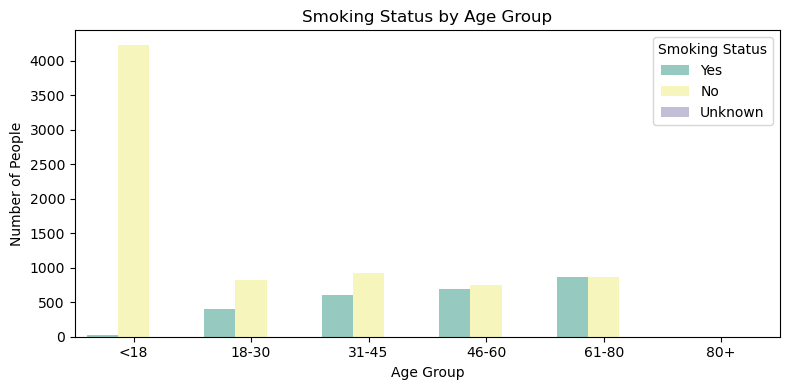

In [37]:
plt.figure(figsize=(8, 4))
sns.countplot(data=merged_df, x='AgeGroup', hue='SMQ020', palette='Set3')
plt.title("Smoking Status by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of People")
plt.legend(title="Smoking Status")
plt.tight_layout()
plt.show()

1. Smoking Status by Age Group
The bar chart displays the distribution of smoking status (Yes, No, Unknown) across different age groups:

<18: The vast majority (over 99%) reported not smoking, with almost no smokers in this group.

18–30: Smoking becomes more common, with around one-third of individuals reporting they smoke.

31–45: Smoking rates continue to rise, reaching nearly 40%.

46–60 & 61–80: These age groups show the highest smoking prevalence, with smokers and non-smokers almost evenly split.


Conclusion: Smoking is rare among youth and more prevalent in middle-aged and older adults.

In [39]:
gender_smoking_rate = merged_df.groupby('Gender')['SMQ020'].value_counts(normalize=True).unstack() * 100
print(gender_smoking_rate)

SMQ020         No   Unknown        Yes
Gender                                
Female  78.712297  0.019335  21.268368
Male    70.417749  0.019988  29.562263


A greater percentage of females (78.7%) are non-smokers compared to males (70.4%).

Males show a higher smoking rate (29.6%) than females (21.3%).

The proportion of unknown responses is low and nearly equal between genders.

Conclusion: There is a clear gender disparity—men are more likely to smoke than women

In [41]:
age_smoking_rate =merged_df.groupby('AgeGroup')['SMQ020'].value_counts(normalize=True).unstack() * 100
print(age_smoking_rate)

SMQ020           No   Unknown        Yes
AgeGroup                                
<18       99.459205  0.000000   0.540795
18-30     67.047308  0.000000  32.952692
31-45     60.574413  0.000000  39.425587
46-60     52.264808  0.000000  47.735192
61-80     49.971082  0.115674  49.913245
80+        0.000000  0.000000   0.000000


C:\Users\chahd\AppData\Local\Temp\ipykernel_17988\3173859119.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_smoking_rate =merged_df.groupby('AgeGroup')['SMQ020'].value_counts(normalize=True).unstack() * 100


Smoking rates steadily increase with age, peaking at 49.9% in the 61–80 age group.

Minors (<18) are almost entirely non-smokers.

Middle-aged adults (31–60) show the highest rates of smoking.

No data is available for the 80+ group.

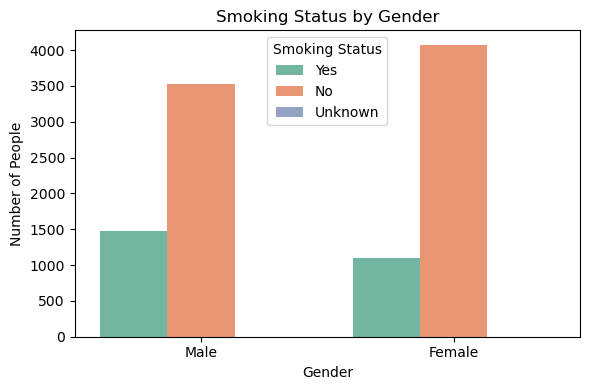

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=merged_df, x='Gender', hue='SMQ020', palette='Set2')
plt.title("Smoking Status by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of People")
plt.legend(title="Smoking Status")
plt.tight_layout()
plt.show()

🔹 Smoking Status by Gender
This visualization compares the smoking status distribution between males and females.

Females have a significantly higher proportion of non-smokers, with nearly 79% indicating they do not smoke.

Only about 21% of females reported smoking.

In contrast, males have a noticeably higher smoking rate, with nearly 30% identifying as smokers.


Conclusion:
The plot clearly shows that females are less likely to smoke than males. Males are more frequently smokers, as reflected both numerically and visually in the plot. This suggests a gender-based difference in smoking behavior that could be influenced by cultural, social, or behavioral factors.